In [1]:
#This notebook checks the Planck lensing data

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import healpy as hp
from colossus.cosmology import cosmology
import scipy.interpolate as I
from src.template_generator import *
from pylab import arange, show, cm

%matplotlib inline

def change_coord(m, coord):
    """ Change coordinates of a HEALPIX map

    Parameters
    ----------
    m : map or array of maps
      map(s) to be rotated
    coord : sequence of two character
      First character is the coordinate system of m, second character
      is the coordinate system of the output map. As in HEALPIX, allowed
      coordinate systems are 'G' (galactic), 'E' (ecliptic) or 'C' (equatorial)

    Example
    -------
    The following rotate m from galactic to equatorial coordinates.
    Notice that m can contain both temperature and polarization.
    >>>> change_coord(m, ['G', 'C'])
    """
    # Basic HEALPix parameters
    npix = m.shape[-1]
    nside = hp.npix2nside(npix)
    ang = hp.pix2ang(nside, np.arange(npix))

    # Select the coordinate transformation
    rot = hp.Rotator(coord=reversed(coord))

    # Convert the coordinates
    new_ang = rot(*ang)
    new_pix = hp.ang2pix(nside, *new_ang)

    return m[..., new_pix]

In [4]:
#prepare masks
mask_sdss=hp.read_map('/Volumes/My Passport/cosmology/sdss3/sdss3_dr12_mask/healpix_mask_LOWZ_North.fits')+hp.read_map('/Volumes/My Passport/cosmology/sdss3/sdss3_dr12_mask/healpix_mask_LOWZ_South.fits')
mask_sdss*=(hp.read_map('/Volumes/My Passport/cosmology/sdss3/sdss3_dr12_mask/healpix_mask_CMASS_North.fits')+hp.read_map('/Volumes/My Passport/cosmology/sdss3/sdss3_dr12_mask/healpix_mask_CMASS_South.fits'))
foo=np.where(mask_sdss>0)
mask_sdss[foo]=1

mask_sdss=hp.pixelfunc.ud_grade(mask_sdss, nside_out=256)
mask_new=change_coord(mask_sdss, 'CG')

#store prepared data
np.savez('time_delay_analysis_meta_data',sdss_mask=np.array(mask_new))

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


/Users/jens/anaconda3/lib/python3.6/site-packages/healpy/fitsfunc.py:326: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  "assume {}".format(schm))


NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [5]:
#load meta data
data=np.load('time_delay_analysis_meta_data.npz')
sdss_mask   = data['sdss_mask']
sdss_mask=hp.pixelfunc.ud_grade(sdss_mask, nside_out=2048)

Converting celestial to galactic coordinates...
Conversion done...
Number of useable GRBs: 148
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


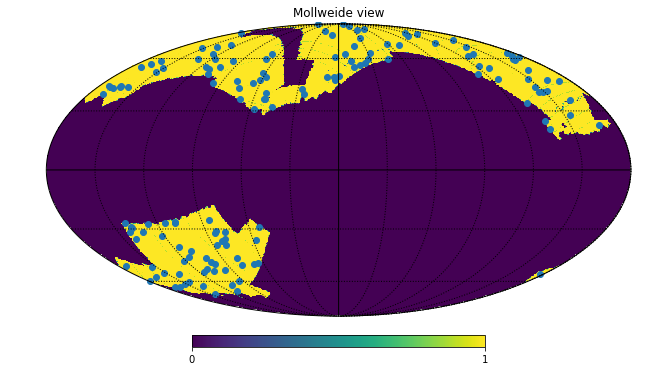

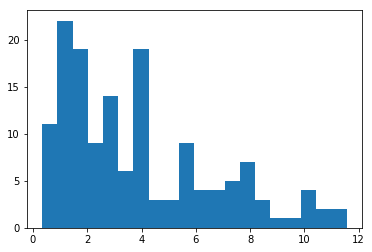

In [6]:
def conv_cel2gal(ra,dec):  
    print('Converting celestial to galactic coordinates...')
    #convert celestial coordinates to galactic coordinates
    #ra and dec given in radians
    r = hp.Rotator(coord=['C','G'])  # Transforms celestial to galactic coordinates
    theta_cel, phi_cel = np.pi/2-dec, ra
    theta_gal, phi_gal = r(theta_cel, phi_cel)  # Apply the conversion
    print('Conversion done...')
    return theta_gal, phi_gal

#load GRB data
nnames=["GRB","z","z_err_+","z_err_-","RA","DEC", "TD21","TD21_err", "TD31","TD31_err","TD32","TD32_err","TD41","TD41_err","TD42","TD42_err", "TD43","TD43_err"]
dataset=pd.read_csv('/Volumes/My Passport/cosmology/sdss3/GRB_time_delay_data/GRBdatanew.rtf', delim_whitespace=True, header=None,names=nnames)
list(dataset.keys())

GRB=dataset['GRB'].values
z=dataset['z'].values
ra=dataset['RA'].values
dec=dataset['DEC'].values

theta_grb, phi_grb = conv_cel2gal(ra/180.*np.pi, dec/180.*np.pi)

ipix_grb=hp.ang2pix(2048, theta_grb, phi_grb)

TD21      = dataset['TD21'].values
TD21_err = dataset['TD21_err'].values 

TD31     = dataset['TD31'].values
TD31_err = dataset['TD31_err'].values

TD32=dataset['TD32'].values
TD32_err = dataset['TD32_err'].values

TD41=dataset['TD41'].values
TD41_err = dataset['TD41_err'].values

TD42=dataset['TD42'].values
TD42_err = dataset['TD42_err'].values

TD43=dataset['TD43'].values
TD43_err = dataset['TD43_err'].values

foo=np.where(sdss_mask[ipix_grb]>0)

GRB=GRB[foo]
z=z[foo]
ra=ra[foo]
dec=dec[foo]

theta_grb=theta_grb[foo]
phi_grb=phi_grb[foo] 
ipix_grb=ipix_grb[foo]

TD21=TD21[foo]
TD21_err=TD21_err[foo]

TD31=TD31[foo]
TD31_err=TD31_err[foo]

TD32=TD32[foo]
TD32_err=TD32_err[foo]

TD41=TD41[foo]
TD41_err=TD41_err[foo]

TD42=TD42[foo]
TD42_err=TD42_err[foo]

TD43=TD43[foo]
TD43_err=TD43_err[foo]

print('Number of useable GRBs:', len(z))

hp.mollview(sdss_mask)
hp.graticule()
hp.projscatter(theta_grb,phi_grb)


plt.savefig('grb_distribution.png', bbox_inches='tight', dpi=300)

plt.show()
plt.hist(z,bins=20)
plt.show()

Processing sample nr:  0


/Users/jens/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if __name__ == '__main__':


[-6.53727776e-15 -7.31534796e-14 -7.34196575e-15 -1.87267355e-15
 -4.00889267e-15 -2.91965588e-13]
[2.88829818e-16 2.10655838e-16 1.89699365e-16 1.85529352e-16
 1.76758795e-16 2.86596756e-16]
Processing sample nr:  1
[-6.87538538e-15 -7.06964061e-14 -6.56861352e-15 -2.43673280e-15
 -5.10224188e-15 -2.47491083e-13]
[2.89672612e-16 2.13060858e-16 1.91087380e-16 2.00880761e-16
 2.00592120e-16 2.50190944e-16]
Processing sample nr:  2
[-5.64749730e-15 -4.87120101e-14 -4.83659619e-15 -3.62324621e-15
 -5.53181706e-15 -1.83852685e-13]
[2.13726927e-16 1.26152569e-16 1.35074017e-16 2.16019085e-16
 1.68460283e-16 1.86848047e-16]
Processing sample nr:  3
[-3.86463160e-15 -3.48916073e-14 -4.14187745e-15 -2.66529955e-15
 -4.95067390e-15 -1.18027894e-13]
[1.44574888e-16 9.38031633e-17 9.80220331e-17 1.52634666e-16
 1.35718503e-16 1.18136160e-16]
Processing sample nr:  4
[-3.32344393e-15 -2.91483659e-14 -3.64419879e-15 -1.87616077e-15
 -4.15782633e-15 -8.96480376e-14]
[1.16059173e-16 7.64003638e-17 7.

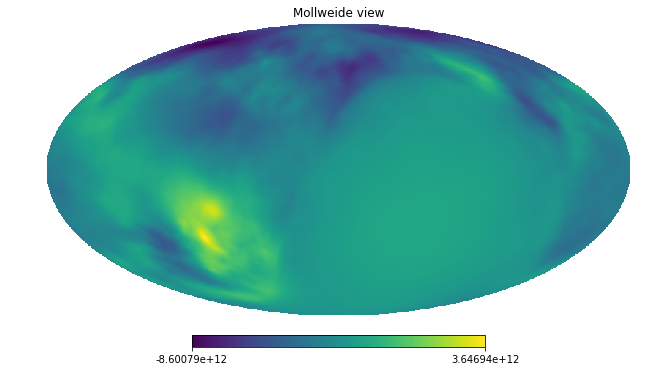

In [351]:
def simple_filter(Tshap, TD, TD_err):
    def runfilter(Tshap, TD, TD_err):
        
        A = np.sum((Tshap*TD)/TD_err**2)
        B = np.sum((Tshap*Tshap)/TD_err**2)
        
        return A/B, np.sqrt(1./B)

    foo=np.where((TD=='None') + (TD_err=='None'))
    
    TSa=np.delete(Tshap, foo)
    TDa=np.delete(TD, foo).astype(np.float32)
    TD_err_a=np.delete(TD_err, foo).astype(np.float32)
        
    return runfilter(TSa, TDa, TD_err_a)

#process files
data = np.load('borg_time_delay_maps.npz')

borg_td = np.zeros(hp.pixelfunc.nside2npix(2048))
cnt=0

mean_td=[]
var_td=[]

tshapiro=[]

for m in data['td']:
    print('Processing sample nr: ', cnt)
    
    maptd = hp.pixelfunc.ud_grade(m, nside_out=2048) 
    
    TSHAP=maptd[ipix_grb]

    tshapiro.append(TSHAP)
    
    mdg = np.zeros(6)    
    vdg = np.zeros(6)    

    mdg[0],vdg[0]= simple_filter(TSHAP, TD21, TD21_err)
    mdg[1],vdg[1]= simple_filter(TSHAP, TD31, TD31_err)
    mdg[2],vdg[2]= simple_filter(TSHAP, TD32, TD32_err)
    mdg[3],vdg[3]= simple_filter(TSHAP, TD41, TD41_err)
    mdg[4],vdg[4]= simple_filter(TSHAP, TD42, TD42_err)
    mdg[5],vdg[5]= simple_filter(TSHAP, TD43, TD43_err)
     
    mean_td.append(mdg)
    var_td.append(vdg)

    print(mdg)
    print(vdg)
    
    borg_td += maptd
    cnt+=1 

borg_td/=cnt    
    
hp.mollview(borg_td)

plt.savefig('shapiro_time_delay.png', bbox_inches='tight', dpi=300)

plt.show()
    

Processing sample nr:  0


/Users/jens/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if __name__ == '__main__':


[-6.53727776e-15 -7.31534796e-14 -7.34196575e-15 -1.87267355e-15
 -4.00889267e-15 -2.91965588e-13]
[2.88829818e-16 2.10655838e-16 1.89699365e-16 1.85529352e-16
 1.76758795e-16 2.86596756e-16]
Processing sample nr:  1
[-6.87538538e-15 -7.06964061e-14 -6.56861352e-15 -2.43673280e-15
 -5.10224188e-15 -2.47491083e-13]
[2.89672612e-16 2.13060858e-16 1.91087380e-16 2.00880761e-16
 2.00592120e-16 2.50190944e-16]
Processing sample nr:  2
[-5.64749730e-15 -4.87120101e-14 -4.83659619e-15 -3.62324621e-15
 -5.53181706e-15 -1.83852685e-13]
[2.13726927e-16 1.26152569e-16 1.35074017e-16 2.16019085e-16
 1.68460283e-16 1.86848047e-16]
Processing sample nr:  3
[-3.86463160e-15 -3.48916073e-14 -4.14187745e-15 -2.66529955e-15
 -4.95067390e-15 -1.18027894e-13]
[1.44574888e-16 9.38031633e-17 9.80220331e-17 1.52634666e-16
 1.35718503e-16 1.18136160e-16]
Processing sample nr:  4
[-3.32344393e-15 -2.91483659e-14 -3.64419879e-15 -1.87616077e-15
 -4.15782633e-15 -8.96480376e-14]
[1.16059173e-16 7.64003638e-17 7.

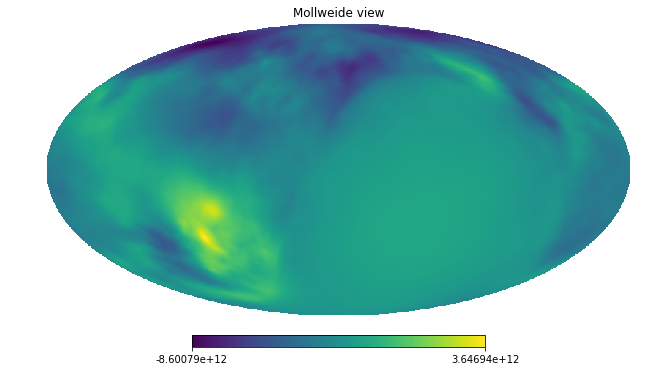

In [8]:
def simple_filter(Tshap, TD, TD_err):
    def runfilter(Tshap, TD, TD_err):
        
        A = np.sum((Tshap*TD)/TD_err**2)
        B = np.sum((Tshap*Tshap)/TD_err**2)
        
        return A/B, np.sqrt(1./B)

    foo=np.where((TD=='None') + (TD_err=='None'))
    
    TSa=np.delete(Tshap, foo)
    TDa=np.delete(TD, foo).astype(np.float32)
    TD_err_a=np.delete(TD_err, foo).astype(np.float32)
        
    return runfilter(TSa, TDa, TD_err_a)

#process files
data = np.load('borg_time_delay_maps.npz')

borg_td = np.zeros(hp.pixelfunc.nside2npix(2048))
cnt=0

mean_td=[]
var_td=[]

tshapiro=[]

for m in data['td']:
    print('Processing sample nr: ', cnt)
    
    maptd = hp.pixelfunc.ud_grade(m, nside_out=2048) 
    
    TSHAP=maptd[ipix_grb]

    tshapiro.append(TSHAP)
    
    mdg = np.zeros(6)    
    vdg = np.zeros(6)    

    mdg[0],vdg[0]= simple_filter(TSHAP, TD21, TD21_err)
    mdg[1],vdg[1]= simple_filter(TSHAP, TD31, TD31_err)
    mdg[2],vdg[2]= simple_filter(TSHAP, TD32, TD32_err)
    mdg[3],vdg[3]= simple_filter(TSHAP, TD41, TD41_err)
    mdg[4],vdg[4]= simple_filter(TSHAP, TD42, TD42_err)
    mdg[5],vdg[5]= simple_filter(TSHAP, TD43, TD43_err)
     
    mean_td.append(mdg)
    var_td.append(vdg)

    print(mdg)
    print(vdg)
    
    borg_td += maptd
    cnt+=1 

borg_td/=cnt    
    
hp.mollview(borg_td)

plt.savefig('shapiro_time_delay.png', bbox_inches='tight', dpi=300)

plt.show()

running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running


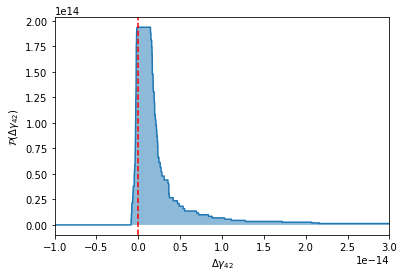

In [32]:
def likelihood_old(ts,terr, tobs, dgamma):
    dt = tobs +np.fabs(terr) - dgamma * ts 
    
    
    foo = np.where((dt<0.))   
    
    res=1
    if(np.shape(foo)[1]>0):
        res=0
    
    return res

def likelihood(ts,terr, tobs, dgamma):
    dtobs= tobs +np.fabs(terr)
    
    aux0=dtobs/ts
    aux1=ts/np.fabs(ts)
    
    foo=np.where(aux1>0)
    bmax=1
    if(np.shape(foo)[1]>0):
        bmax=np.min(aux0[foo])
    
    foo=np.where(aux1<0)
    bmin=-1
    if(np.shape(foo)[1]>0):
        bmin=np.max(aux0[foo])
     
    
    res=0
    if((dgamma>bmin)*(dgamma<bmax)):
        res=1/(bmax-bmin)
    
    return res
    
    
TS=np.array(tshapiro)    
    
'''
TD21
TD31
TD32
TD41
TD42
TD43
'''    

dgamma=np.linspace(-1e-14,3e-14,20000)


pdfs=[]
for ts in TS:
    print('running')
    y=np.zeros(len(dgamma))
    cnt=0
    for dgg in dgamma:
        
        TD=TD42
        TD_err=TD42_err
        
        foo=np.where((TD=='None') + (TD_err=='None'))
    
        TSa=np.delete(ts, foo)
        TDa=np.delete(TD, foo).astype(np.float32)
        TD_err_a=np.delete(TD_err, foo).astype(np.float32)
        
        
        y[cnt]=likelihood(TSa, TDa,TD_err_a, dgg)
        cnt+=1
    pdfs.append(y)


pdfs=np.array(pdfs)

mean_pdfs = np.average(pdfs, axis=0)
    
    
plt.plot(dgamma,mean_pdfs)
#plt.ylim([0,1.2])
plt.xlim([-1e-14,3e-14])
plt.xlabel(r'$\Delta \gamma_{42}$')
plt.ylabel(r'$\mathcal{P}(\Delta \gamma_{42})$')
plt.fill_between(dgamma,mean_pdfs, alpha=0.5)
plt.axvline(x=0, color='red', ls='--')


plt.savefig('dgamma_42.png', bbox_inches='tight', dpi=300)


plt.show()


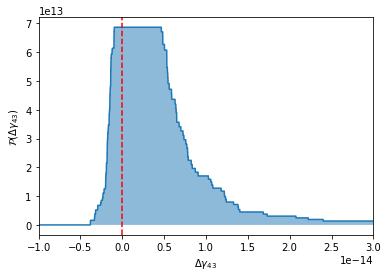

In [26]:
plt.plot(dgamma,mean_pdfs)
#plt.ylim([0,1.2])
plt.xlim([-1e-14,3e-14])
plt.xlabel(r'$\Delta \gamma_{43}$')
plt.ylabel(r'$\mathcal{P}(\Delta \gamma_{43})$')
plt.fill_between(dgamma,mean_pdfs, alpha=0.5)
plt.axvline(x=0, color='red', ls='--')

plt.show()

In [ ]:
nside = hp.npix2nside(len(mm))

# Get theta, phi for non-rotated map
t,p = hp.pix2ang(nside, np.arange(hp.nside2npix(nside))) #theta, phi

# Define a rotator
r0 = hp.Rotator(coord=['G','C'])
trot, prot = r0(t,p)
#r1 = hp.Rotator(deg=False, rot=[np.pi/2,0])
#trot, prot = r1(t,p)

rot_map = hp.get_interp_val(mm, trot, prot)

cmap = cm.RdYlBu
cmap.set_under('w')
hp.mollview(rot_map,cmap=cmap,unit=r'$\kappa_{\rm{BORG}}$',min=-0.01,max=0.01, title='')
hp.graticule()

plt.savefig('borg_vs_planck_convergence_map.png', bbox_inches='tight', dpi=300)
plt.show()

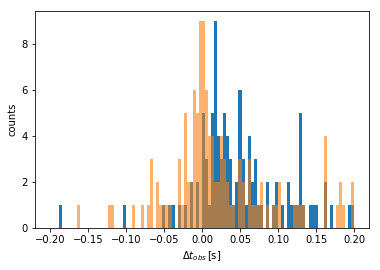

In [59]:
plt.hist(TD21+TD21_err,bins=100,range=[-0.2,0.2])
plt.hist(TD21-TD21_err,bins=100,range=[-0.2,0.2],alpha=0.60)
plt.ylabel('counts')
plt.xlabel(r'$\Delta t_{obs} \, [\mathrm{s}]$')

plt.savefig('grb_time_delays.png', bbox_inches='tight', dpi=300)
plt.show()


In [85]:
print(np.shape(k_map))
print(np.shape(mean))
print(np.shape(mask))


(50331648,)
(3145728,)
(50331648,)


In [6]:
map=hp.read_map('/Volumes/My Passport/cosmology/sdss3/planck_data/COM_CMB_IQU-smica_2048_R3.00_full.fits')

NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


/Users/jens/anaconda3/lib/python3.6/site-packages/healpy/fitsfunc.py:326: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  "assume {}".format(schm))


Ordering converted to RING


NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


/Users/jens/anaconda3/lib/python3.6/site-packages/healpy/fitsfunc.py:326: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  "assume {}".format(schm))


Ordering converted to RING


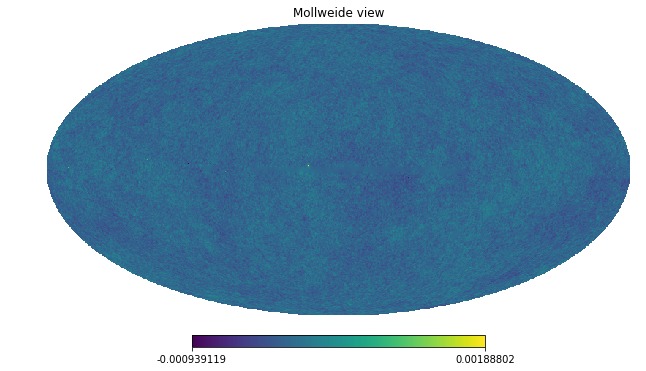

In [74]:
isw_map = hp.read_map('/Volumes/My Passport/cosmology/sdss3/planck_data/COM_CMB_IQU-smica_2048_R3.00_full.fits',0)

hp.mollview(isw_map)